In [ ]:
# Don
# Dr. Ofori
# 9 October 2023
# DSC - 510
# Going into week 6

In [ ]:
_='''
Suppose you have a dataset with multiple variables that may be related to each other. 
How can you use Python data visualization libraries to explore potential relationships 
and identify patterns between variables? 

Provide at least two creative ideas for data visualization techniques that can be 
used to explore relationships between variables in a dataset.
'''

In [3]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [44]:
standings = pd.read_csv("../downloads/NFL.csv")
#print(standings.head())

#print(standings)

In [33]:
print(standings.columns)

Index(['Tm', 'W', 'L', 'W-L%', 'PF', 'PA', 'PD', 'MoV', 'SoS', 'SRS', 'OSRS',
       'DSRS'],
      dtype='object')


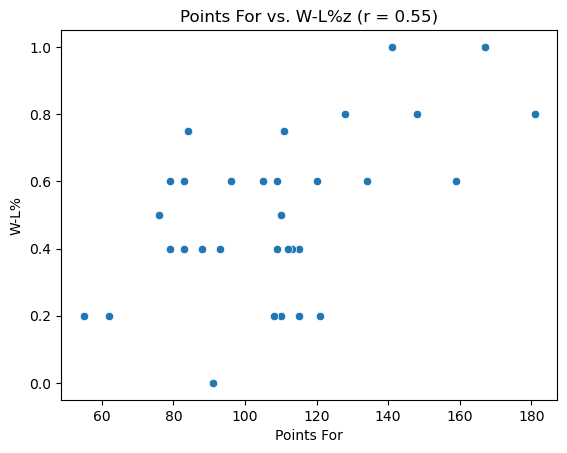

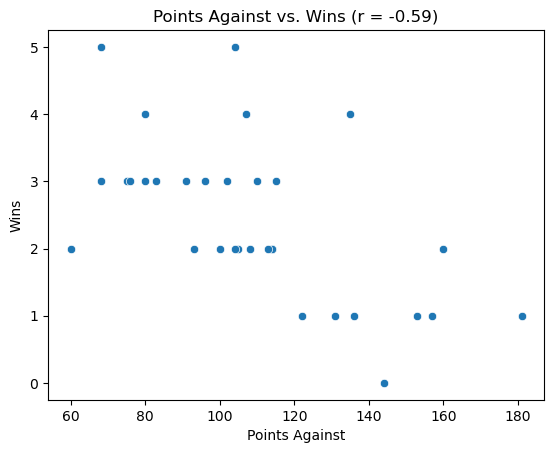

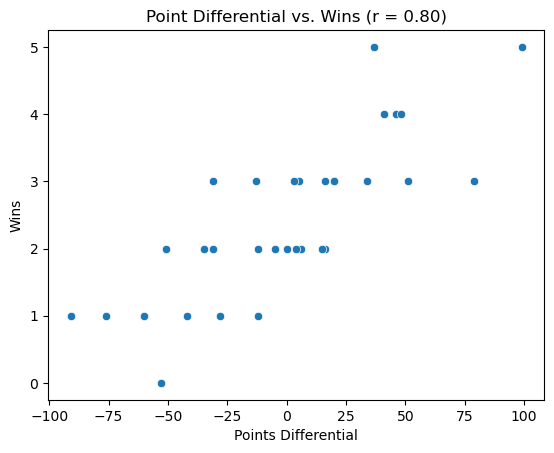

In [39]:
def plot_scatter_with_corr(x, y, data, xlabel, ylabel, title):
    correlation = np.corrcoef(data[x], data[y])[0, 1]
    sns.scatterplot(x=x, y=y, data=data)
    plt.title(f'{title} (r = {correlation:.2f})')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_scatter_with_corr('PF', 'W-L%', standings, 'Points For', 'W-L%', 'Points For vs. W-L%z')
plot_scatter_with_corr('PA', 'W', standings, 'Points Against', 'Wins', 'Points Against vs. Wins')
plot_scatter_with_corr('PD', 'W', standings, 'Points Differential', 'Wins', 'Point Differential vs. Wins')

In [7]:
_='''
The Pearson correlation coefficient, r, measures the linear relationship between two variables. 
Its value ranges from -1 to 1:

1: Perfect positive linear relationship.
-1: Perfect negative linear relationship.
0: No linear relationship.

'''

In [8]:
_='''
sns.scatterplot(x='PF', y='W', data=standings)
plt.title('Points For vs. Wins')
plt.xlabel('Points For')
plt.ylabel('Wins')
plt.show()

sns.scatterplot(x='PA', y='W', data=standings)
plt.title('Points Against vs. Wins')
plt.xlabel('Points Against')
plt.ylabel('Wins')
plt.show()

sns.scatterplot(x='PD', y='W', data=standings)
plt.title('Point Differential vs. Wins')
plt.xlabel('Points Differential')
plt.ylabel('Wins')
plt.show()
'''

In [12]:
offense = pd.read_csv("../downloads/offense.csv", skiprows=1)
print(offense.head())
#print(offense)

#Headers skipped tot yds & TO, passing yards, rushing yards, and penalties

    Rk                   Tm    G     PF     Yds    Ply  Y/P   TO   FL   1stD  \
0  1.0       Miami Dolphins  5.0  181.0  2568.0  309.0  8.3  8.0  3.0  124.0   
1  2.0  San Francisco 49ers  5.0  167.0  2013.0  318.0  6.3  2.0  2.0  124.0   
2  3.0        Buffalo Bills  5.0  159.0  1952.0  317.0  6.2  7.0  2.0  110.0   
3  4.0        Detroit Lions  5.0  148.0  1922.0  331.0  5.8  6.0  3.0  110.0   
4  5.0  Philadelphia Eagles  5.0  141.0  2022.0  359.0  5.6  5.0  1.0  119.0   

   ...  Yds.2  TD.1  Y/A  1stD.2   Pen  Yds.3  1stPy   Sc%   TO%    EXP  
0  ...  929.0  12.0  6.9    39.0  32.0  280.0    5.0  50.0  13.8  96.63  
1  ...  782.0  11.0  4.5    45.0  33.0  279.0   13.0  53.7   3.7  84.39  
2  ...  581.0   7.0  4.4    39.0  30.0  244.0    6.0  50.0  13.0  66.33  
3  ...  705.0   9.0  4.3    42.0  31.0  311.0    7.0  40.4  10.5  38.60  
4  ...  820.0   6.0  4.6    55.0  29.0  230.0   12.0  52.8   9.4  52.96  

[5 rows x 28 columns]


In [1]:
# Create a pair plot for the 'offense' dataframe
# sns.pairplot(offense)
# Display the plot
# plt.show()

In [29]:
#corr_matrix = offense.corr(numeric_only=True)
#print(corr_matrix)

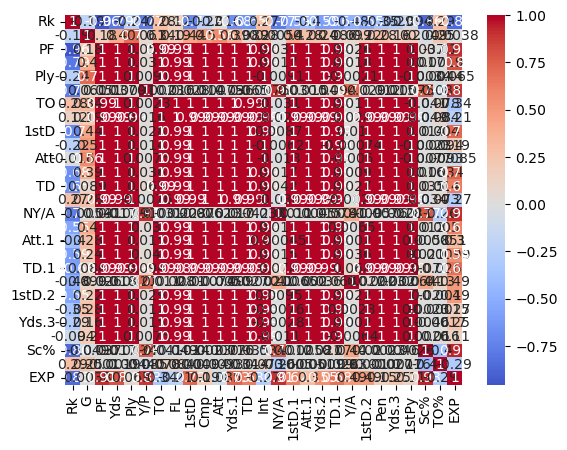

In [25]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

In [26]:
offense = pd.merge(offense, standings[['Tm', 'W']], on='Tm', how='inner')
print(offense.columns)
# Plotting all variables in combined_data against 'W'
#sns.pairplot(offense, x_vars=offense.columns.difference(['Tm', 'W']), y_vars=['W'])
#plt.show()

Index(['Rk', 'Tm', 'G', 'PF', 'Yds', 'Ply', 'Y/P', 'TO', 'FL', '1stD', 'Cmp',
       'Att', 'Yds.1', 'TD', 'Int', 'NY/A', '1stD.1', 'Att.1', 'Yds.2', 'TD.1',
       'Y/A', '1stD.2', 'Pen', 'Yds.3', '1stPy', 'Sc%', 'TO%', 'EXP', 'W'],
      dtype='object')


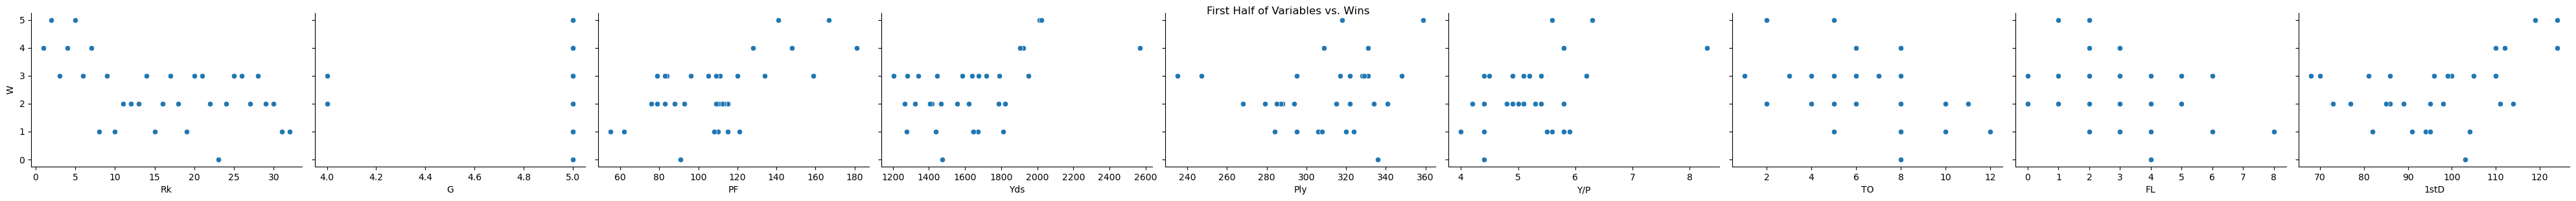

In [28]:

# Splitting the columns into two halves for better visibility
columns_first_half = ['Tm', 'W', 'Rk', 'G', 'PF', 'Yds', 'Ply', 'Y/P', 'TO', 'FL', '1stD']
columns_second_half = ['Tm', 'W', 'Cmp', 'Att', 'Yds.1', 'TD', 'Int', 'NY/A', '1stD.1', 'Att.1', 'Yds.2', 'TD.1', 'Y/A', '1stD.2', 'Pen', 'Yds.3', '1stPy', 'Sc%', 'TO%', 'EXP']

# Plotting the first half of columns against 'W'
sns.pairplot(offense, x_vars=columns_first_half[2:], y_vars=['W'], height=3, aspect=1.5)
plt.suptitle("First Half of Variables vs. Wins", y=1.0)
plt.show()


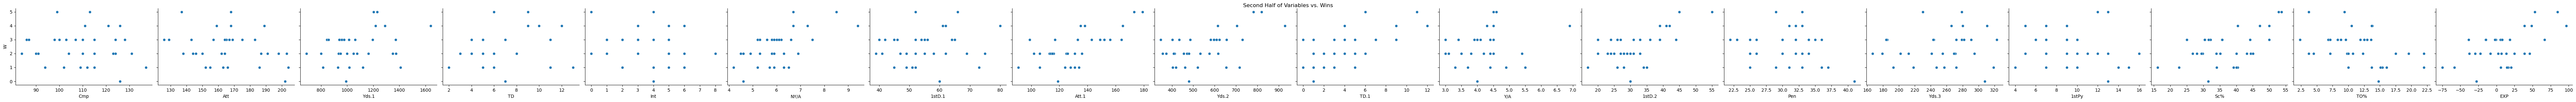

In [29]:
# Plotting the second half of columns against 'W'
sns.pairplot(offense, x_vars=columns_second_half[2:], y_vars=['W'], height=3, aspect=1.5)
plt.suptitle("Second Half of Variables vs. Wins", y=1.02)
plt.show()

In [24]:
passing_offense = pd.read_csv("../downloads/passing.csv")
passing_offense = pd.merge(passing_offense, standings[['Tm', 'W']], on='Tm', how='inner')

In [32]:
corr_matrix2 = passing_offense.corr(numeric_only=True)
print(corr_matrix)

#sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', center=0)
#plt.show()



             Rk         G       Cmp       Att      Cmp%       Yds        TD  \
Rk     1.000000 -0.368423 -0.679135 -0.530699 -0.338365 -0.959253 -0.697128   
G     -0.368423  1.000000  0.498515  0.558404 -0.106289  0.385520  0.089239   
Cmp   -0.679135  0.498515  1.000000  0.877013  0.293755  0.674422  0.332735   
Att   -0.530699  0.558404  0.877013  1.000000 -0.198653  0.510609  0.190837   
Cmp%  -0.338365 -0.106289  0.293755 -0.198653  1.000000  0.365279  0.290235   
Yds   -0.959253  0.385520  0.674422  0.510609  0.365279  1.000000  0.697754   
TD    -0.697128  0.089239  0.332735  0.190837  0.290235  0.697754  1.000000   
TD%   -0.543825 -0.099005  0.054640 -0.124281  0.358156  0.541933  0.943405   
Int   -0.145216  0.373266  0.204532  0.323828 -0.247736  0.144820  0.047134   
Int%   0.011058  0.257537 -0.022776  0.083480 -0.258633  0.000301 -0.014249   
Lng    0.155776  0.053992 -0.227405 -0.073682 -0.326357 -0.005623  0.163031   
Y/A   -0.657383  0.038842  0.075819 -0.210779  0.581

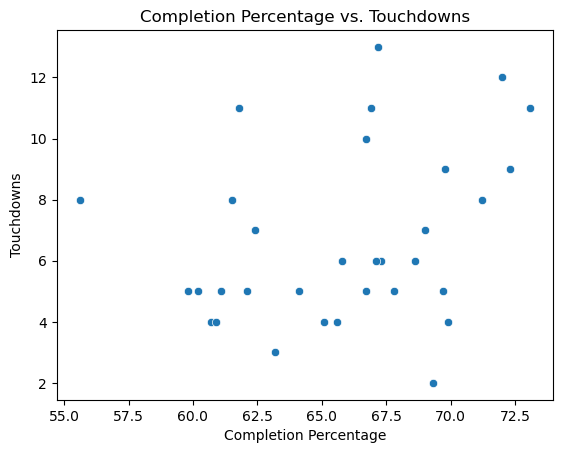

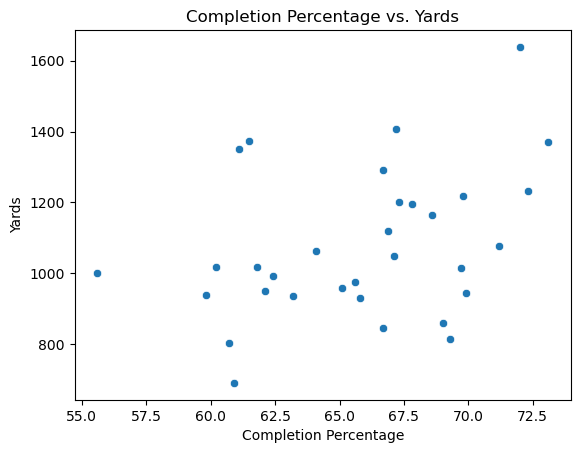

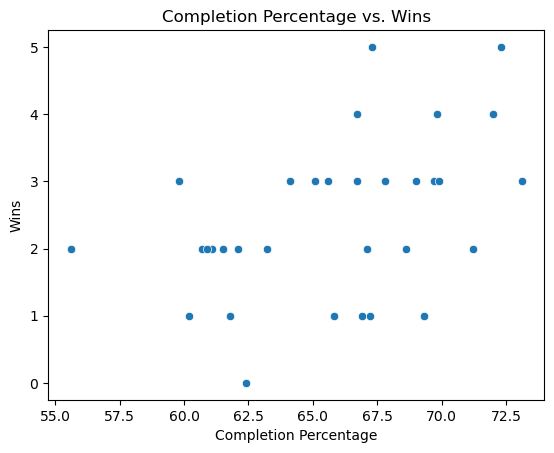

In [48]:
# Graph Cmp% vs TD
sns.scatterplot(x='Cmp%', y='TD', data=passing_offense)
plt.title('Completion Percentage vs. Touchdowns')
plt.xlabel('Completion Percentage')
plt.ylabel('Touchdowns')
plt.show()

# Graph Cmp% vs Yds
sns.scatterplot(x='Cmp%', y='Yds', data=passing_offense)
plt.title('Completion Percentage vs. Yards')
plt.xlabel('Completion Percentage')
plt.ylabel('Yards')
plt.show()

# Graph Cmp% vs W
sns.scatterplot(x='Cmp%', y='W', data=passing_offense)
plt.title('Completion Percentage vs. Wins')
plt.xlabel('Completion Percentage')
plt.ylabel('Wins')
plt.show()

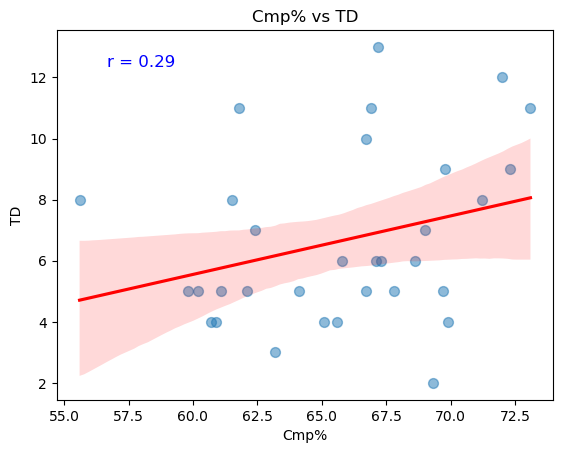

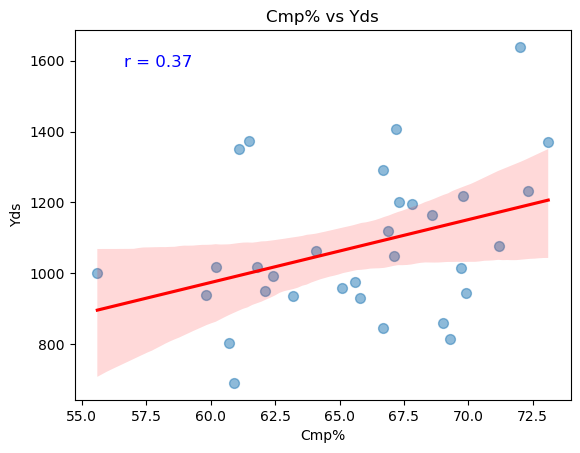

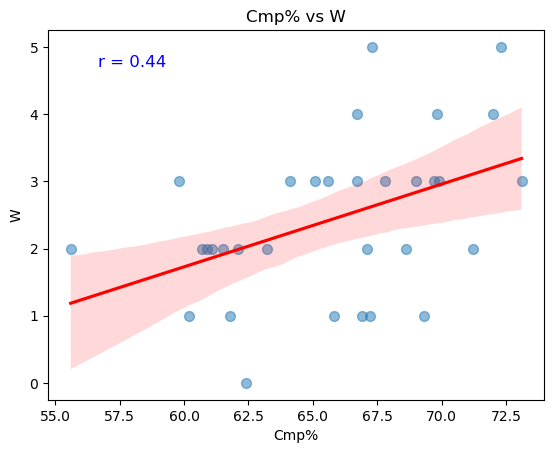

In [49]:

# Custom function to plot with regression line and correlation coefficient
def plot_with_regression_and_r(data, x_col, y_col):
    sns.regplot(x=x_col, y=y_col, data=data, scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'red'})
    
    # Calculate correlation coefficient
    correlation = data[x_col].corr(data[y_col])
    
    # Add the correlation coefficient on the plot
    plt.annotate(f'r = {correlation:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12, color='blue')
    
    plt.title(f'{x_col} vs {y_col}')
    plt.show()

# Plots
plot_with_regression_and_r(passing_offense, 'Cmp%', 'TD')
plot_with_regression_and_r(passing_offense, 'Cmp%', 'Yds')
plot_with_regression_and_r(passing_offense, 'Cmp%', 'W')

In [49]:
rushing_offense = pd.read_csv("../downloads/rushing.csv")
rushing_offense = pd.merge(rushing_offense, standings[['Tm', 'W']], on='Tm', how='inner')

In [48]:
scoring_offense = pd.read_csv("../downloads/scoring.csv")
scoring_offense = pd.merge(scoring_offense, standings[['Tm', 'W']], on='Tm', how='inner')
print(scoring_offense.columns)


Index(['Rk', 'Tm', 'G', 'RshTD', 'RecTD', 'PR TD', 'KR TD', 'FblTD', 'IntTD',
       'OthTD', 'AllTD', '2PM', '2PA', 'D2P', 'XPM', 'XPA', 'FGM', 'FGA',
       'Sfty', 'Pts', 'Pts/G', 'W'],
      dtype='object')


In [43]:
conversions = pd.read_csv("../downloads/conversions.csv", skiprows=1)
#conversions = pd.merge(conversions, standings[['Tm', 'W']], on='Tm', how='inner')
print(conversions.columns)


Index(['Rk', 'Tm', 'G', '3DAtt', '3DConv', '3D%', '4DAtt', '4DConv', '4D%',
       'RZAtt', 'RZTD', 'RZPct'],
      dtype='object')


In [ ]:
drive_averages = pd.read_csv("../downloads/drive_averages.csv", skiprows=1)
drive_averages = pd.merge(drive_averages, standings[['Tm', 'W']], on='Tm', how='inner')

In [ ]:
defense = pd.read_csv("../downloads/defense.csv", skiprows=1)
defense = pd.merge(defense, standings[['Tm', 'W']], on='Tm', how='inner')


#print(defense.head())
#print(defense)
#Headers skipped tot yds & TO, passing yards, rushing yards, and penalties